In [1]:
# importing required packages
import networkx as nx 
import matplotlib.cbook
from collections import defaultdict
import numpy as np

In [2]:
#Defining class to create the graph
class Graph:
    #List to store the vertex
    Vertex = []
    #Dictionary to store the graph
    graph = dict()
    #Constructor used to initialise an object
    def __init__(self):
        self.Vertex = []
        self.graph = {}
    #addEdge function to add the edges
    def addEdge(self, node1, node2):
        if node1 in self.graph.keys():
            self.graph[node1].append(node2)
        else:
            self.graph[node1] = [node2]

In [3]:
#Function used to retrieve the kmers
def get_kmers(seq,k):
    kmerDict={}
    for i in range(len(seq)-k+1):
        kmerDict[i] = seq[i:i+k]
    return kmerDict

In [4]:
#Defining the suffix and prefix functions
def suffix(str1):
    return(str1[1:])
def prefix(str2):
    return(str2[0:-1])

In [5]:
#break_down function to find out the unique (k-1)mer from the kmer dictionary 
def break_down(K1):
    b_kmer = dict()
    #Index for prefix
    i = 0
    #Index for suffix
    j = 1
    for key,val in K1.items():
        #Increment of i and j with 1 to over write the next prefix which is same as previous suffix
        b_kmer[i] = prefix(val)
        b_kmer[j] = suffix(val)
        i = i + 1;
        j = j + 1;
    return b_kmer

In [6]:
#Function used to sort the kmer list in lexicographic order
def kmer_list(dict_K):
    s = [];
    for key,val in dict_K.items():
        #Appending all kmers in the list
        s.append(val)
    #Returning the kmer in list
    return s

In [7]:
#Function to create deBrujn_Graph
def deBrujn_Graph(K1):
    #Creating a directed Graph
    dgraph = nx.DiGraph()
    if(type(K1) == dict):
        #Iterating through the graph
        for key,val in K1.items():
            #Adding edge to directed graph
            #Only 1 second node is present
            if(len(val) == 1):
                dgraph.add_edge(key,val[0])
            #More than 1 second node(s) present
            else:
                for i in range(len(val)):
                    dgraph.add_edge(key,val[i])
    elif(type(K1) == list):
        #If K1 is a list-with sequenced kmers
        for i in range(len(K1)-1):
            dgraph.add_edge(K1[i], K1[i+1])
    #Drawing the directed graph
    nx.draw_shell(dgraph,with_labels = True,node_size=800)

In [8]:
#Function to create adjacency matrix (a directed graph)
def create_AdjMat(kmer):
    #Creating zeros matrix
    Adj = np.zeros((len(kmer),len(kmer)))
    for i in range(len(kmer)):
        for j in range(len(kmer)):
            #Mapping done based on directed graphs
            if(kmer[i] != kmer[j] and prefix(kmer[j]) == suffix(kmer[i])):
                Adj[i][j] = 1
    return Adj;

In [9]:
#Function to find the starting and ending of the string
def start_end(K1, dictK, Vertex):
    start = ""
    ending = ""
    #Creating the adjacency matrix
    a2 = create_AdjMat(dictK)
    #Computing outdegree from adjacency matrix
    outdegree = a2.sum(axis = 1)
    #Computing indegree from adjacency matrix
    indegree = a2.sum(axis = 0)
    #In order to obtain the starting and ending points accurately and stop the testing once
    #the starting and ending points are known
    count1 = 0
    count2 = 0
    for i in range(len(outdegree)):
        #Obtaining the ending point as it's outdegree is minimum, i.e, 0(ideal)
        if(outdegree[i] == min(outdegree) and count1 < 1):
            ending = ending + str(dictK[i])
            count1 = count1 + 1
        #Obtaining the starting point as it's indegree is minimum, i.e, 0(ideal) 
        elif(indegree[i] == min(indegree) and count2 < 1):
            start = start + str(dictK[i])
            count2 = count2 + 1
    return start,ending,a2

In [10]:
def Reconstruct(graph, Vertex, starting, ending): 
    # Mark all the vertices as not visited
    visited = np.zeros(len(Vertex))
    # Create a queue for Breadth First Search 
    queue = []
    # Enqueue the Starting Vertex(starting)
    queue.append(starting);
    index = 0
    #Find index at which starting value occurs
    for i in range(len(Vertex)):
        if(Vertex[i] == starting):
            index = i;
    #Assigning starting vertex(starting) as visited
    visited[index] = 1;
    path = []
    path.append(starting);
    while len(queue)>0:
        #Dequeue a vertex from queue 
        inter = queue.pop()
        #If this adjacent node is the destination node, then return true 
        if (inter == ending):
            #print(visited)
            return path
        # Else, continue to do Breadth First Search 
        for key,val in graph.items():
            #Used to find the index at which next node is present in order to mark visited
            index = 0
            #If there is only 1 edge2 from edge1 
            if(len(val) == 1):
                for idx in range(len(Vertex)):
                    if(val[0] == Vertex[idx]):
                        index = idx
                        break
                if(key == inter and visited[index] == 0):
                    #We queue in the next vertex and mark that location as visited
                    queue.append(val[0])
                    visited[index] = 1
                    path.append(val[0])
            #If there are multiple edge2 from edge1    
            else:
                for i in range(len(val)):
                    index = 0
                    for idx in range(len(Vertex)):
                        if(val[i] == Vertex[idx]):
                            index = idx
                            break
                    if (key == inter and visited[index] == 0):
                         #We queue in the next vertex and mark that location as visited
                        queue.append(Vertex[index]) 
                        visited[index] = 1
                        path.append(Vertex[index])
    # If Breadth First Search is completed without reaching ending Vertex(d) 
    return [] 

In [11]:
#Kmer length
k = 3
#Given sequence - 1
seq1 = "TAATGCC"

In [12]:
#Obtaining the kmer sequences
K1 = get_kmers(seq1,k)
K1

{0: 'TAA', 1: 'AAT', 2: 'ATG', 3: 'TGC', 4: 'GCC'}

In [13]:
#The unique (k-1)mers
K2 = break_down(K1)
#Displaying the (k-1) mers
K2

{0: 'TA', 1: 'AA', 2: 'AT', 3: 'TG', 4: 'GC', 5: 'CC'}

In [14]:
#Obtaining the lexicographic order of the (k-1)mers
s = kmer_list(K2)
print(s)

['TA', 'AA', 'AT', 'TG', 'GC', 'CC']


In [15]:
#Using (k-1)mers
#Initialising the Graph object
g1 = Graph()
#Graph is stored in the form of a dictionary
#Creating Graph by passing the edges
for i in range(len(s)-1):
    #Adding the edges
    g1.addEdge(s[i],s[i + 1])
#Unique kmers would be the vertices of the graph
g1.Vertex = list(set(s))
#Displaying the graph dictionary
print(g1.graph)
#Displaying the vertex
print(g1.Vertex)

{'TA': ['AA'], 'AA': ['AT'], 'AT': ['TG'], 'TG': ['GC'], 'GC': ['CC']}
['CC', 'GC', 'AA', 'TG', 'TA', 'AT']


In [16]:
#Displaying the Graph with intial (k-1)mer
deBrujn_Graph(g1.graph)

In [17]:
#Creating Graph based on suffix and prefix for lexicographic ordered (k-1)mers
g2 = Graph()
#Sorting the list
s.sort()
#Vertex won't change for both graphs
g2.Vertex = g1.Vertex
#For loop to test suffix and prefix relations to create the nodes
for i in range(len(s)):
    for j in range(len(s)):
        if(prefix(s[j]) == suffix(s[i]) and i != j):
            g2.addEdge(s[i],s[j])
g2.graph

{'AA': ['AT'],
 'AT': ['TA', 'TG'],
 'GC': ['CC'],
 'TA': ['AA', 'AT'],
 'TG': ['GC']}

In [18]:
#Obtaining the starting and the ending nodes
start, ending, adjMat = start_end(g2.graph, s, g2.Vertex)

In [19]:
#Reconstruction from k-mer list
K3 = Reconstruct(g2.graph, g2.Vertex, start, ending)
#Displaying the (k-1) mers in sequential order
K3

['AA', 'AT', 'TA', 'TG', 'GC', 'CC']

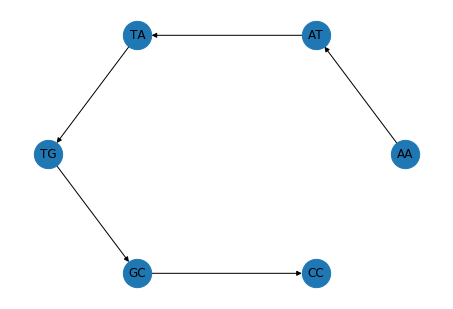

In [20]:
#Obtaining the deBrujn_Graph for the same
deBrujn_Graph(K3)

In [21]:
#Given Sequence-2
k = 5
seq2 = "GCGGTAATGCAGTTGAC"

In [22]:
#Obtaining the kmer sequences
K1 = get_kmers(seq2,k)
K1

{0: 'GCGGT',
 1: 'CGGTA',
 2: 'GGTAA',
 3: 'GTAAT',
 4: 'TAATG',
 5: 'AATGC',
 6: 'ATGCA',
 7: 'TGCAG',
 8: 'GCAGT',
 9: 'CAGTT',
 10: 'AGTTG',
 11: 'GTTGA',
 12: 'TTGAC'}

In [23]:
#The unique (k-1)mers
K2 = break_down(K1)
#Displaying the (k-1) mers
K2

{0: 'GCGG',
 1: 'CGGT',
 2: 'GGTA',
 3: 'GTAA',
 4: 'TAAT',
 5: 'AATG',
 6: 'ATGC',
 7: 'TGCA',
 8: 'GCAG',
 9: 'CAGT',
 10: 'AGTT',
 11: 'GTTG',
 12: 'TTGA',
 13: 'TGAC'}

In [24]:
#Obtaining the lexicographic order of the (k-1)mers
s = kmer_list(K2)
print(s)

['GCGG', 'CGGT', 'GGTA', 'GTAA', 'TAAT', 'AATG', 'ATGC', 'TGCA', 'GCAG', 'CAGT', 'AGTT', 'GTTG', 'TTGA', 'TGAC']


In [25]:
#Using (k-1)mers
#Initialising the Graph object
g1 = Graph()
#Graph is stored in the form of a dictionary
#Creating Graph by passing the edges
for i in range(len(s)-1):
    #Adding the edges
    g1.addEdge(s[i],s[i + 1])
#Unique kmers would be the vertices of the graph
g1.Vertex = list(set(s))
#Displaying the graph dictionary
print(g1.graph)
#Displaying the vertex
print(g1.Vertex)

{'GCGG': ['CGGT'], 'CGGT': ['GGTA'], 'GGTA': ['GTAA'], 'GTAA': ['TAAT'], 'TAAT': ['AATG'], 'AATG': ['ATGC'], 'ATGC': ['TGCA'], 'TGCA': ['GCAG'], 'GCAG': ['CAGT'], 'CAGT': ['AGTT'], 'AGTT': ['GTTG'], 'GTTG': ['TTGA'], 'TTGA': ['TGAC']}
['GTAA', 'GTTG', 'AGTT', 'CAGT', 'TGCA', 'CGGT', 'TAAT', 'GGTA', 'GCAG', 'AATG', 'TTGA', 'TGAC', 'GCGG', 'ATGC']


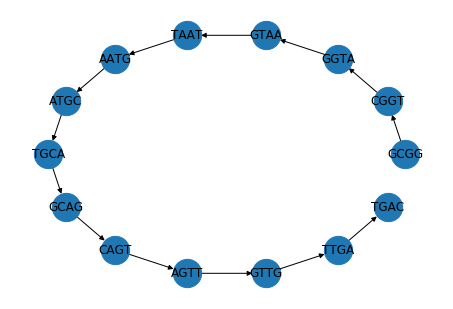

In [26]:
#Displaying the Graph with intial (k-1)mer
deBrujn_Graph(g1.graph)

In [27]:
g2 = Graph()
s.sort()
g2.Vertex = g1.Vertex
for i in range(len(s)):
    for j in range(len(s)):
        if(prefix(s[j]) == suffix(s[i]) and i != j):
            g2.addEdge(s[i],s[j])
g2.graph

{'AATG': ['ATGC'],
 'AGTT': ['GTTG'],
 'ATGC': ['TGCA'],
 'CAGT': ['AGTT'],
 'CGGT': ['GGTA'],
 'GCAG': ['CAGT'],
 'GCGG': ['CGGT'],
 'GGTA': ['GTAA'],
 'GTAA': ['TAAT'],
 'GTTG': ['TTGA'],
 'TAAT': ['AATG'],
 'TGCA': ['GCAG'],
 'TTGA': ['TGAC']}

In [28]:
#Obtaining the starting and the ending nodes
start, ending, adjMat = start_end(g2.graph, s, g2.Vertex)

In [29]:
#Reconstruction from (k-1) mer list
K3 = Reconstruct(g2.graph, g2.Vertex, start, ending)
#Displaying the (k-1) mers in sequential order
K3

['GCGG',
 'CGGT',
 'GGTA',
 'GTAA',
 'TAAT',
 'AATG',
 'ATGC',
 'TGCA',
 'GCAG',
 'CAGT',
 'AGTT',
 'GTTG',
 'TTGA',
 'TGAC']

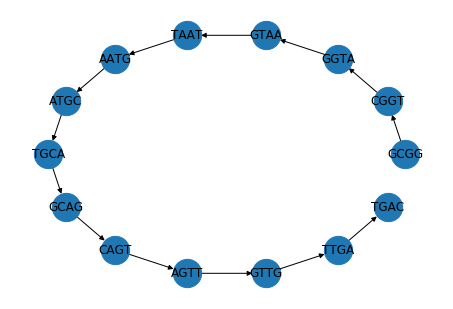

In [30]:
#Obtaining the deBrujn_Graph for the same
deBrujn_Graph(K3)

In [31]:
#Given Sequence-3
k = 5
seq3 = "TTGAGTGCCAGCG"

In [32]:
#Obtaining the kmer sequences
K1 = get_kmers(seq3,k)
#Displaying the kmers
K1

{0: 'TTGAG',
 1: 'TGAGT',
 2: 'GAGTG',
 3: 'AGTGC',
 4: 'GTGCC',
 5: 'TGCCA',
 6: 'GCCAG',
 7: 'CCAGC',
 8: 'CAGCG'}

In [33]:
#The unique (k-1)mers
K2 = break_down(K1)
#Displaying the (k-1) mers
K2

{0: 'TTGA',
 1: 'TGAG',
 2: 'GAGT',
 3: 'AGTG',
 4: 'GTGC',
 5: 'TGCC',
 6: 'GCCA',
 7: 'CCAG',
 8: 'CAGC',
 9: 'AGCG'}

In [34]:
#Obtaining the lexicographic order of the (k-1)mers
s = kmer_list(K2)
print(s)

['TTGA', 'TGAG', 'GAGT', 'AGTG', 'GTGC', 'TGCC', 'GCCA', 'CCAG', 'CAGC', 'AGCG']


In [35]:
#Using (k-1)mers
#Initialising the Graph object
g1 = Graph()
#Graph is stored in the form of a dictionary
#Creating Graph by passing the edges
for i in range(len(s)-1):
    #Adding the edges
    g1.addEdge(s[i],s[i + 1])
#Unique kmers would be the vertices of the graph
g1.Vertex = list(set(s))
#Displaying the graph dictionary
print(g1.graph)
#Displaying the vertex
print(g1.Vertex)

{'TTGA': ['TGAG'], 'TGAG': ['GAGT'], 'GAGT': ['AGTG'], 'AGTG': ['GTGC'], 'GTGC': ['TGCC'], 'TGCC': ['GCCA'], 'GCCA': ['CCAG'], 'CCAG': ['CAGC'], 'CAGC': ['AGCG']}
['CAGC', 'CCAG', 'TGCC', 'GTGC', 'AGTG', 'TGAG', 'TTGA', 'GCCA', 'GAGT', 'AGCG']


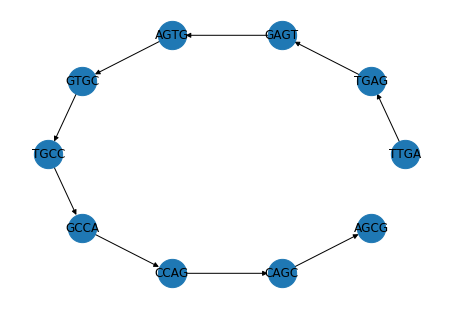

In [36]:
#Displaying the Graph with intial (k-1)mer
deBrujn_Graph(g1.graph)

In [37]:
g2 = Graph()
s.sort()
g2.Vertex = g1.Vertex
for i in range(len(s)):
    for j in range(len(s)):
        if(prefix(s[j]) == suffix(s[i]) and i != j):
            g2.addEdge(s[i],s[j])
g2.graph

{'AGTG': ['GTGC'],
 'CAGC': ['AGCG'],
 'CCAG': ['CAGC'],
 'GAGT': ['AGTG'],
 'GCCA': ['CCAG'],
 'GTGC': ['TGCC'],
 'TGAG': ['GAGT'],
 'TGCC': ['GCCA'],
 'TTGA': ['TGAG']}

In [38]:
#Obtaining the starting and the ending nodes
start, ending, adjMat = start_end(g2.graph, s, g2.Vertex)

In [39]:
#Reconstruction from (k-1) mer list
K3 = Reconstruct(g2.graph, g2.Vertex, start, ending)
#Displaying the (k-1) mers in sequential order
K3

['TTGA',
 'TGAG',
 'GAGT',
 'AGTG',
 'GTGC',
 'TGCC',
 'GCCA',
 'CCAG',
 'CAGC',
 'AGCG']

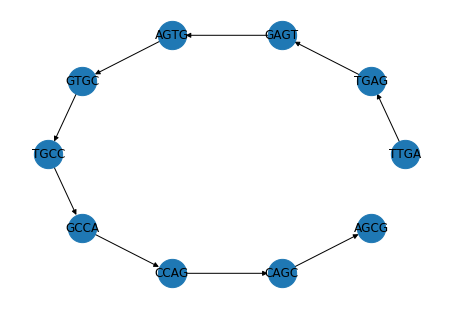

In [40]:
#Obtaining the deBrujn_Graph for the same
deBrujn_Graph(K3)